<a href="https://colab.research.google.com/github/alixtrn/BASC0080/blob/main/practical_w4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

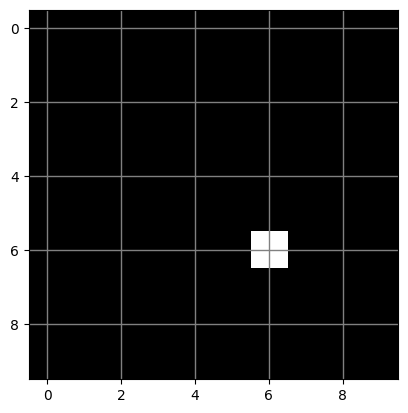

In [10]:
## Python code to simulate Conway's Game of Life
##=============================================================================

## creating a 10x10 grid where each cell is either alive or dead: 1 or 0:

#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import time

#creating the matrix
n = 10 # size of matrix
mat = np.zeros((n,n)) # create an (n x n) matrix with zeors

# adding a single random live cell + ensuring it's not on the boundary
r = np.random.randint(1, n - 1) # select a random row from 1 to n-1
#(we know that n=10 but we call it n in case we want to change the code)
c = np.random.randint(1, n - 1) # select a random row from 1 to n-1
mat[r, c] = 1

temp_mat = mat.copy() # create a temporary matrix

# Plot initial image
plt.imshow(np.flipud(mat.T), cmap=plt.get_cmap('gray'), interpolation='nearest', aspect='equal')
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.show()

In [11]:
## implementing the rules

# first rule: the cells on the boundaries are set to be de  d
mat[0,:] = 0 # 1st row
mat[n-1,:] = 0 # last row
mat[:,0] = 0 # 1st column
mat[:,n-1] = 0 # last column


In [12]:

a = np.random.randint(1, n - 1)
b = np.random.randint(1, n - 1)
# comment: maybe create a function to designate the neighbours so you don't have to repeat yourself every time.
if mat[a, b] == 1 :
    # second rule : any live cell with fewer than two live neighbours dies
    if np.sum(mat[a-1:a+2, b-1:b+2]) < 2 :
        temp_mat[a, b] = 0
    # third rule : any live cell with two or three live neighbours lives on to the next generation
    if np.sum(mat[a-1:a+2, b-1:b+2])==2 or 3 :
        temp_mat[a, b] = 1
    # fourth rule : any live celles with more than 3 live neighbours dies
    if np.sum(mat[a-1:a+2, b-1:b+2]) > 3 :
        temp_mat[a, b] = 0

In [ ]:
from IPython.display import display, clear_output

def update_game_of_life(current_mat, n_size):
    next_mat = current_mat.copy()

    # Apply the first rule: boundary cells are always dead
    next_mat[0,:] = 0
    next_mat[n_size-1,:] = 0
    next_mat[:,0] = 0
    next_mat[:,n_size-1] = 0

    # Iterate over every cell in the internal grid (not boundaries)
    for i in range(1, n_size - 1):
        for j in range(1, n_size - 1):
            # Calculate live neighbors (sum of 3x3 grid minus the cell itself)
            live_neighbors = np.sum(current_mat[i-1:i+2, j-1:j+2]) - current_mat[i, j]

            # Apply Conway's Game of Life rules
            if current_mat[i, j] == 1:  # Current cell is alive
                # Rule 2: Any live cell with fewer than two live neighbours dies (underpopulation).
                # Rule 4: Any live cell with more than three live neighbours dies (overpopulation).
                if live_neighbors < 2 or live_neighbors > 3:
                    next_mat[i, j] = 0
                # Rule 3: Any live cell with two or three live neighbours lives on to the next generation.
                elif live_neighbors == 2 or live_neighbors == 3:
                    next_mat[i, j] = 1 # Stays alive
            else:  # Current cell is dead
                # Rule 5: Any dead cell with exactly three live neighbours becomes a live cell (reproduction).
                if live_neighbors == 3:
                    next_mat[i, j] = 1
    return next_mat

# Number of iterations
num_iterations = 10

print("Starting Game of Life Simulation:")

# Loop through iterations
for iteration in range(num_iterations):
    clear_output(wait=True)
    print(f"Iteration {iteration + 1}/{num_iterations}")

    # Update the matrix for the next generation
    mat = update_game_of_life(mat, n)

    # Plot the current state
    plt.imshow(np.flipud(mat.T), cmap=plt.get_cmap('gray'), interpolation='nearest', aspect='equal')
    plt.title(f"Iteration {iteration + 1}")
    plt.grid(color='grey', linestyle='-', linewidth=1)
    plt.show()

    # Pause for a short time to observe the changes
    time.sleep(0.5)

print("Simulation Finished.")